In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import re



plt.style.use('Solarize_Light2')
%matplotlib inline

In [30]:
data=pd.read_csv(r"C:\Users\Seema.Sd\OneDrive\Desktop\intern task\Fake_News_Detection-master\train.csv")

In [31]:
data.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [32]:
data.shape

(10240, 2)

In [33]:
data.isnull().sum()

Statement    0
Label        0
dtype: int64

In [34]:
data.dropna(inplace = True)

In [35]:
data.isna().sum()

Statement    0
Label        0
dtype: int64

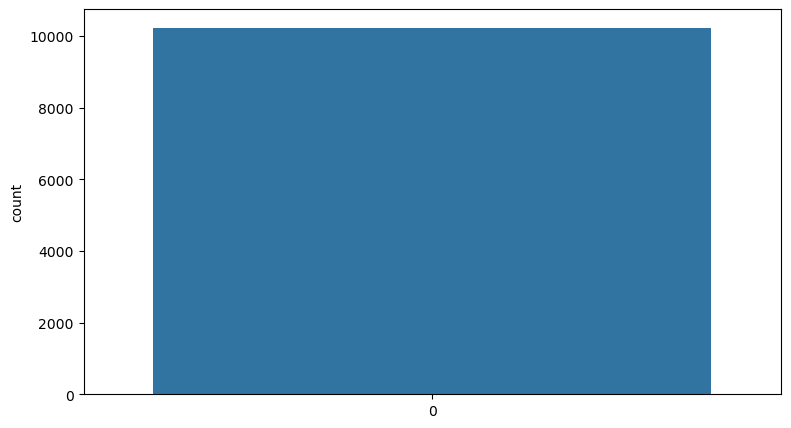

In [37]:
plt.figure(figsize = (9, 5))
sns.countplot(data['Label'])

plt.show()

In [38]:
data.dtypes

Statement    object
Label          bool
dtype: object

In [39]:
data['Label'] = data['Label'].astype(str)

In [40]:
data.dtypes

Statement    object
Label        object
dtype: object

In [41]:
data.head(10)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [45]:
ps = PorterStemmer()

In [50]:
corpus=[]
sentences=[]
for i in range(0,len(data)):
    review=re.sub('[^a-zA-Z]',' ', data['Statement'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [51]:
corpus[:20]

['say anni list polit group support third trimest abort demand',
 'declin coal start start natur ga took start begin presid georg w bush administr',
 'hillari clinton agre john mccain vote give georg bush benefit doubt iran',
 'health care reform legisl like mandat free sex chang surgeri',
 'econom turnaround start end term',
 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad',
 'jim dunnam live district repres year',
 'person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg',
 'howev took million oregon lotteri fund port newport eventu land new noaa marin oper center pacif',
 'say gop primari oppon glenn grothman joe leibham cast compromis vote cost million higher electr cost',
 'first time histori share nation popular vote margin smaller latino vote margin',
 'sinc nearli million american slip middl class poverti',
 'mitt romney governor massachusett didnt slow rate growth govern actual cut',
 'economi ble

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 5000, ngram_range = (1, 3))

In [53]:
X = cv.fit_transform(corpus).toarray()
y = data['Label']

In [54]:
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 0        False
 1         True
 2         True
 3        False
 4         True
          ...  
 10235     True
 10236     True
 10237     True
 10238    False
 10239    False
 Name: Label, Length: 10240, dtype: object)

In [55]:
X.shape, y.shape

((10240, 5000), (10240,))

<Axes: xlabel='Label', ylabel='count'>

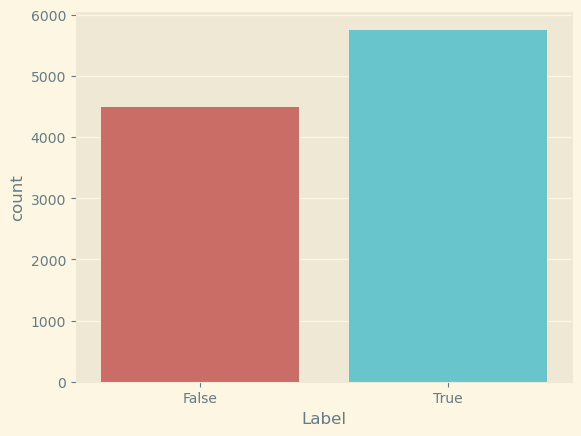

In [56]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(data)

In [58]:
data['Label'].value_counts()

Label
True     5752
False    4488
Name: count, dtype: int64

In [59]:
labels=data.Label
labels.head(10)

0    False
1     True
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9     True
Name: Label, dtype: object

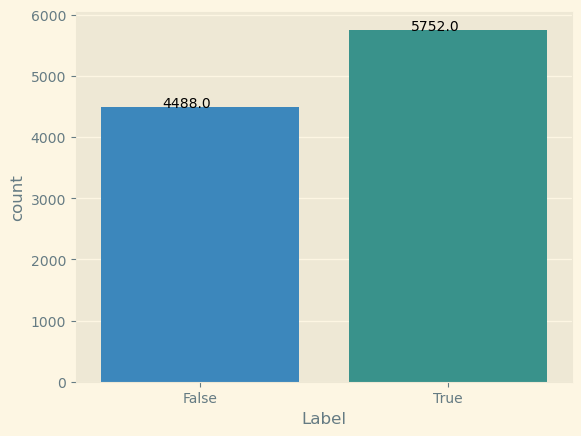

In [60]:
ax=sns.countplot(x ='Label', data = data)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [73]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [74]:
nb_y_pred = nb_classifier.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [77]:
nb_cm

array([[470, 452],
       [382, 744]], dtype=int64)

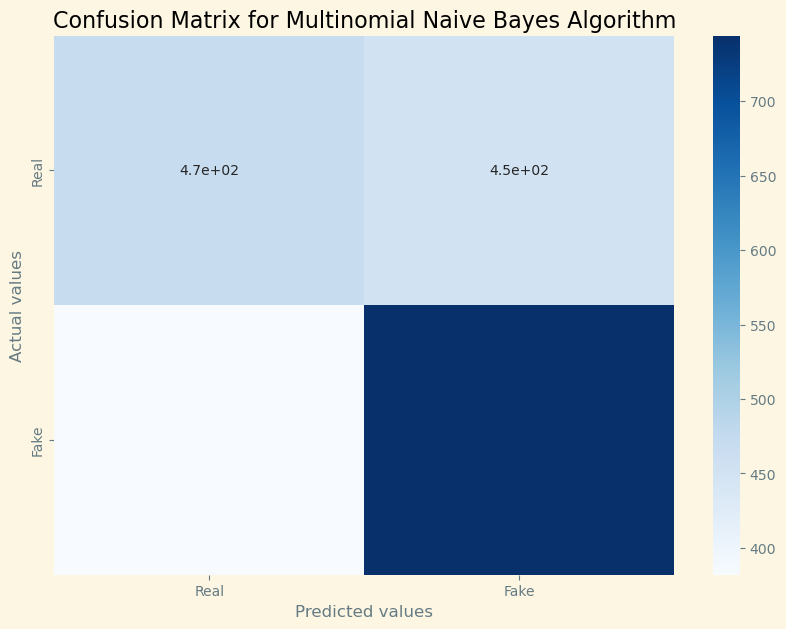

In [78]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()


In [79]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 59.18%
Accuracy score for alpha=0.2 is: 59.28%
Accuracy score for alpha=0.3 is: 59.33%
Accuracy score for alpha=0.4 is: 59.38%
Accuracy score for alpha=0.5 is: 59.42%
Accuracy score for alpha=0.6 is: 59.47%
Accuracy score for alpha=0.7 is: 59.18%
Accuracy score for alpha=0.8 is: 59.13%
Accuracy score for alpha=0.9 is: 59.23%
Accuracy score for alpha=1.0 is: 59.28%
--------------------------------------------
The best accuracy is 59.47% with alpha value as 0.6
